In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sea_ice_model import * 
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def delete_incomplete(dataframe,divisor=2.4):
    for i,index in enumerate(dataframe.columns):
    #   跳过第一天和最后一天
        
        if i == 0 or i == (dataframe.shape[1]-1):
            continue
        day_count = dataframe[index].sum()
        front_day_count = dataframe[dataframe.columns[i-1]].sum()
        next_day_count =  dataframe[dataframe.columns[i+1]].sum()
        if day_count <( (front_day_count + next_day_count)/divisor):
            dataframe[index]=0


In [3]:
# train_dir = r'E:\python_workfile\sea_ice_classification\\training6'

# csv_dir = train_dir + '\\csv\\add_threshold' 

csv_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\split_VV_HH\VV'
csv_files = glob.glob(csv_dir + '\*.csv')



In [6]:
data_2019 = get_data_from_csv(csv_files[20:195])

In [8]:

data_2020 = get_data_from_csv(csv_files[-155:])


In [9]:
process_sea_ice_train_dataframe(data_2019)

In [10]:

process_sea_ice_train_dataframe(data_2020)


In [11]:
data_2019["time"]= pd.to_datetime(data_2019['time'],errors='coerce')

In [12]:

data_2020["time"]= pd.to_datetime(data_2020['time'],errors='coerce')
 

In [13]:
hist_data_2019 = data_2019[['time','sig0']]

In [14]:

hist_data_2020 = data_2020[['time','sig0']]

# 画直方图时间序列

In [15]:
sea_ice_daily_2019 = hist_data_2019.groupby(['time'])
sea_ice_daily_2020 = hist_data_2020.groupby(['time'])

In [16]:
bins =  np.arange(-25,-5,0.05)


In [17]:
f = lambda x: pd.Series(np.histogram(x, bins=bins)[0], index=bins[:-1])

df2019 = sea_ice_daily_2019.apply(f)
df2020 = sea_ice_daily_2020.apply(f)

In [18]:
df2019 = df2019.T

df2020 = df2020.T

In [19]:
# 处理数据不全的天
delete_incomplete(df2019,2.4)
delete_incomplete(df2020,2.4)


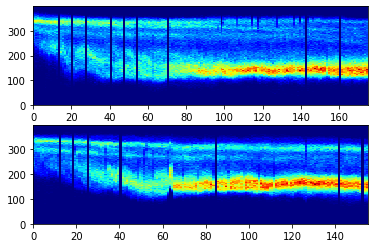

In [22]:
fig,(ax1,ax2) = plt.subplots(2,1)
ax1.pcolormesh(df2019,cmap=plt.cm.jet)

ax2.pcolormesh(df2020,cmap=plt.cm.jet)



In [48]:
y = np.linspace(-25,-5,100)

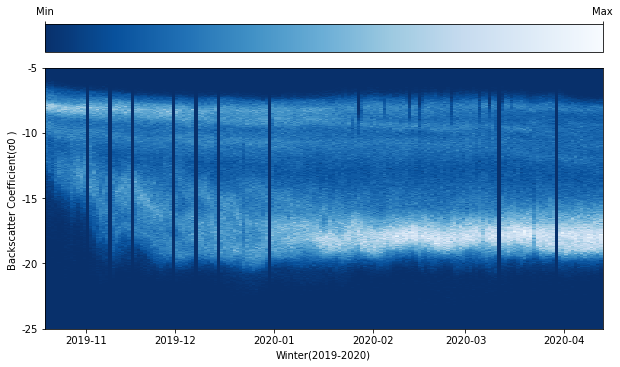

In [28]:
plt.figure(figsize=(10,6)) 
plt.xticks([13,41,72,103,132,163],[ '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04'])
plt.yticks([0,100,200,300,399],[-25,-20,-15,-10,-5])
plt.pcolormesh(df2019,cmap='Blues_r')
cb = plt.colorbar(location='top')
tick_locator = ticker.MaxNLocator(nbins=2)
cb.locator = tick_locator
cb.set_ticks([0, 259])
cb.set_ticklabels(['Min',  'Max'])

plt.xlabel('Winter(2019-2020)')
plt.ylabel('Backscatter Coefficient(σ0 ) ')
# plt.title('Daily time series of histograms 2019-winter HH')
plt.savefig('Daily time series of histograms 2019-winter VV')
plt.show()


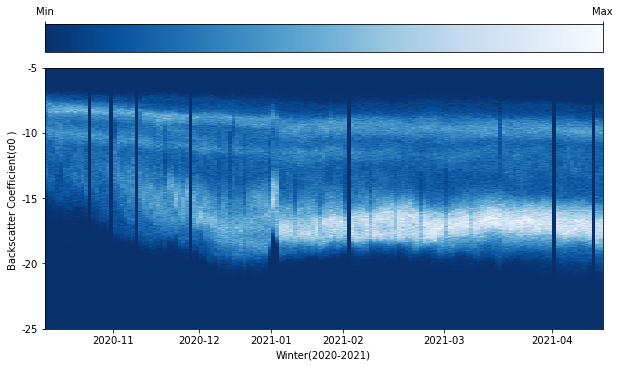

In [35]:
plt.figure(figsize=(10,6)) 
plt.xticks([19,43,63,83,111,141],['2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04'])
plt.yticks([0,100,200,300,399],[-25,-20,-15,-10,-5])
plt.pcolormesh(df2020,cmap='Blues_r')
cb = plt.colorbar(location='top')
tick_locator = ticker.MaxNLocator(nbins=2)
cb.locator = tick_locator
cb.set_ticks([0, 264])
cb.set_ticklabels(['Min',  'Max'])

plt.xlabel('Winter(2020-2021)')
plt.ylabel('Backscatter Coefficient(σ0 ) ')
plt.savefig('Daily time series of histograms 2020-winter VV')
plt.show()

# 画月平均sig0变化图(未完成)

In [4]:
data = get_data_from_csv(csv_files)

In [5]:
process_sea_ice_train_dataframe(data)

In [7]:
data

,Unnamed: 0,lon,lat,sig0,time,ice_type,large_than_threshold,week,day,month,year,julian_week,julian_day,quarter,quarter1,fyi_myi
0,0,-13.515144,72.439582,-17.160000,2019-05-14,2,0,19,134,5,2019,0,0,2019Q2,2,0
1,1,-20.253861,72.282521,-13.700000,2019-05-14,4,1,19,134,5,2019,0,0,2019Q2,2,1
2,2,-19.713095,72.319302,-12.520000,2019-05-14,4,1,19,134,5,2019,0,0,2019Q2,2,1
3,3,-19.170587,72.355121,-11.810000,2019-05-14,4,1,19,134,5,2019,0,0,2019Q2,2,1
4,4,-18.626372,72.389973,-11.960000,2019-05-14,4,1,19,134,5,2019,0,0,2019Q2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20434,20434,-168.622506,66.498740,-15.810000,2021-04-13,3,0,15,103,4,2021,100,700,2021Q2,2,0
20435,20435,-168.868682,66.539381,-15.866667,2021-04-13,3,0,15,103,4,2021,100,700,2021Q2,2,0
20436,20436,-169.116086,66.579136,-15.710000,2021-04-13,3,0,15,103,4,2021,100,700,2021Q2,2,0
20437,20437,-168.520643,66.241208,-14.686667,2021-04-13,3,0,15,103,4,2021,100,700,2021Q2,2,0


In [8]:
month_mean_dataframe = data.groupby(['month','year','fyi_myi'])['sig0'].mean()

In [10]:
month_mean_dataframe

month  year  fyi_myi
1      2020  0         -16.725183
             1         -10.726168
       2021  0         -16.038515
             1         -11.341320
2      2020  0         -16.726885
             1         -10.893182
       2021  0         -16.111142
             1         -11.694574
3      2020  0         -16.793474
             1         -10.892875
       2021  0         -16.109876
             1         -11.812636
4      2020  0         -17.172052
             1         -11.388768
       2021  0         -16.305035
             1         -12.259202
5      2019  0         -16.660204
             1         -13.211683
       2020  0         -16.935706
             1         -12.037136
10     2019  0         -13.346263
             1          -9.291120
       2020  0         -13.350349
             1          -9.627783
11     2019  0         -15.520811
             1          -9.936398
       2020  0         -14.789773
             1         -10.185234
12     2019  0         -16.

In [25]:
# 一年冰sigmod0
month_mean_dataframe[:,:,0][:,2020]

month
1    -16.725183
2    -16.726885
3    -16.793474
4    -17.172052
5    -16.935706
10   -13.350349
11   -14.789773
12   -16.004445
Name: sig0, dtype: float64

In [35]:
colors = {2019:'blue', 2020:'orange',2021:'green'}

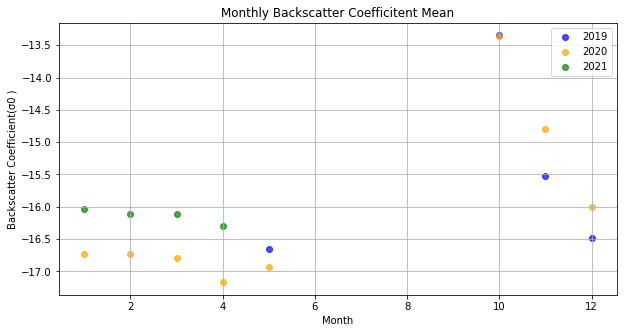

In [46]:
# fig = plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
for year in colors.keys():
    ax.scatter(month_mean_dataframe[:,:,0][:,year].index,month_mean_dataframe[:,:,0][:,year],c=colors[year],label=year,alpha=0.7)
ax.legend()
ax.grid(True)
plt.xlabel('Month')
plt.ylabel('Backscatter Coefficient(σ0 )')
plt.title('Monthly Backscatter Coefficitent Mean')
plt.savefig('Monthly Backscatter Coefficitent Mean')
plt.show()